# Download Cellxgene collections metadata

Here we download metadata on all the human datasets in [CellxGene collections](https://cellxgene.cziscience.com/collections) using the [cellxgene_census API](https://chanzuckerberg.github.io/cellxgene-census/index.html).

The main outputs are:
- `/nfs/team205/ed6/data/cellxgene_hsapiens_cell_metadata.csv` - cell level metadata for all adult *H.Sapiens* datasets
- `/nfs/team205/ed6/bin/sc_target_evidence/data/cellxgene_hsapiens_donor_metadata.csv` - donor level metadata (used for dataset selection)

In [1]:
import cellxgene_census
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Open connection to cellxgene

In [5]:
census = cellxgene_census.open_soma()

The "stable" release is currently 2023-12-15. Specify 'census_version="2023-12-15"' in future calls to open_soma() to ensure data consistency.


## Get cell level metadata

Following tutorial https://chanzuckerberg.github.io/cellxgene-census/cellxgene_census_docsite_quick_start.html#python-quick-start 

See [here](https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/3.0.0/schema.md#obs-cell-metadata) for list of all the possible `obs` columns. 

In [6]:
cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
    column_names = ["assay", "tissue", "tissue_general", "suspension_type", 
        "disease", "disease_ontology_term_id",
        'dataset_id', 'is_primary_data', 'donor_id', 'development_stage_ontology_term_id',
        'cell_type_ontology_term_id',
        'cell_type']
)

# Concatenates results to pyarrow.Table
cell_metadata = cell_metadata.concat()

# Converts to pandas.DataFrame
cell_metadata = cell_metadata.to_pandas()

In [7]:
cell_metadata.head()

,assay,tissue,tissue_general,suspension_type,disease,disease_ontology_term_id,dataset_id,is_primary_data,donor_id,development_stage_ontology_term_id,cell_type_ontology_term_id,cell_type
0,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,2bdd3a2c-2ff4-4314-adf3-8a06b797a33a,False,H200.1030,HsapDv:0000087,CL:0000128,oligodendrocyte
1,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,2bdd3a2c-2ff4-4314-adf3-8a06b797a33a,False,H200.1030,HsapDv:0000087,CL:0002453,oligodendrocyte precursor cell
2,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,2bdd3a2c-2ff4-4314-adf3-8a06b797a33a,False,H200.1030,HsapDv:0000087,CL:0002605,astrocyte of the cerebral cortex
3,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,2bdd3a2c-2ff4-4314-adf3-8a06b797a33a,False,H200.1030,HsapDv:0000087,CL:0002605,astrocyte of the cerebral cortex
4,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,2bdd3a2c-2ff4-4314-adf3-8a06b797a33a,False,H200.1030,HsapDv:0000087,CL:0002605,astrocyte of the cerebral cortex


## Get metadata on datasets

In [8]:
census_datasets = census["census_info"]["datasets"].read().concat().to_pandas()

# for convenience, indexing on the soma_joinid which links this to other census data.
census_datasets = census_datasets.set_index("soma_joinid")

In [9]:
census_datasets

,collection_id,collection_name,collection_doi,dataset_id,dataset_version_id,dataset_title,dataset_h5ad_path,dataset_total_cell_count
soma_joinid,,,,,,,,
0,4dca242c-d302-4dba-a68f-4c61e7bad553,Comparative transcriptomics reveals human-spec...,10.1126/science.ade9516,2bdd3a2c-2ff4-4314-adf3-8a06b797a33a,7eb7f2fd-fd74-4c99-863c-97836415652e,Human: Great apes study,2bdd3a2c-2ff4-4314-adf3-8a06b797a33a.h5ad,156285
1,d17249d2-0e6e-4500-abb8-e6c93fa1ac6f,Transcriptomic cytoarchitecture reveals princi...,10.1126/science.adf6812,f5b0810c-1664-4a62-ad06-be1d9964aa8b,d4427196-7876-4bdd-a929-ae4d177ec776,Dissection: Angular gyrus (AnG),f5b0810c-1664-4a62-ad06-be1d9964aa8b.h5ad,110752
2,d17249d2-0e6e-4500-abb8-e6c93fa1ac6f,Transcriptomic cytoarchitecture reveals princi...,10.1126/science.adf6812,e4ddac12-f48f-4455-8e8d-c2a48a683437,3280113b-7148-4a3e-98d4-015f443aab8a,Supercluster: CGE-derived interneurons,e4ddac12-f48f-4455-8e8d-c2a48a683437.h5ad,129495
3,d17249d2-0e6e-4500-abb8-e6c93fa1ac6f,Transcriptomic cytoarchitecture reveals princi...,10.1126/science.adf6812,e2808a6e-e2ea-41b9-b38c-4a08f1677f02,dc092185-3b8e-4fcb-ae21-1dc106d683ac,Dissection: Primary auditory cortex(A1),e2808a6e-e2ea-41b9-b38c-4a08f1677f02.h5ad,139054
4,d17249d2-0e6e-4500-abb8-e6c93fa1ac6f,Transcriptomic cytoarchitecture reveals princi...,10.1126/science.adf6812,d01c9dff-abd1-4825-bf30-2eb2ba74597e,c4959ded-83dc-4442-aac7-9a59bdb47801,Supercluster: Deep layer (non-IT) excitatory n...,d01c9dff-abd1-4825-bf30-2eb2ba74597e.h5ad,92969
...,...,...,...,...,...,...,...,...
646,180bff9c-c8a5-4539-b13b-ddbc00d643e6,Molecular characterization of selectively vuln...,10.1038/s41593-020-00764-7,f9ad5649-f372-43e1-a3a8-423383e5a8a2,0912e658-ccd7-43e9-8d81-4349432115f9,Molecular characterization of selectively vuln...,f9ad5649-f372-43e1-a3a8-423383e5a8a2.h5ad,8168
647,a72afd53-ab92-4511-88da-252fb0e26b9a,Single-cell atlas of peripheral immune respons...,10.1038/s41591-020-0944-y,456e8b9b-f872-488b-871d-94534090a865,fcc85817-ef31-4056-9a96-b3730ccec522,Single-cell atlas of peripheral immune respons...,456e8b9b-f872-488b-871d-94534090a865.h5ad,44721
648,38833785-fac5-48fd-944a-0f62a4c23ed1,Construction of a human cell landscape at sing...,10.1038/s41586-020-2157-4,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,998d8dbd-2f42-4611-9973-2da95db46c29,Construction of a human cell landscape at sing...,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf.h5ad,598266


#### Check samples from "unknown" stage -- are they fetal?

In [10]:
donors_unknown = cell_metadata[cell_metadata['development_stage_ontology_term_id'] == 'unknown'].drop_duplicates(['donor_id', 'tissue_general', 'disease'])
unknown_dataset_ids = donors_unknown.value_counts('dataset_id').index

In [11]:
keep_unknown = [
    '9f222629-9e39-47d0-b83f-e08d610c7479', # HLCA
    '066943a2-fdac-4b29-b348-40cede398e4e',
    '965386e9-1e4f-466d-bf59-ebdca4b66b9b', # Single cell RNA sequencing of bone marrow mononuclear cells from healthy donors and B-cell lymphoma patients following CD19 CAR T-cell therapy
    'd8da613f-e681-4c69-b463-e94f5e66847f', # A molecular single-cell lung atlas of lethal COVID-19
    '9dbab10c-118d-496b-966a-67f1763a6b7d', # COVID-19 immune features revealed by a large-scale single-cell transcriptome atlas
    'f64e1be1-de15-4d27-8da4-82225cd4c035', # HTAN MSK - Single cell profiling reveals novel tumor and myeloid subpopulations in small cell lung cancer
    'd41f45c1-1b7b-4573-a998-ac5c5acb1647', # HTAN MSK - transcriptional connectivity
    '56c4912d-2bae-4b64-98f2-af8a84389208', # Harmonized single-cell landscape, intercellular crosstalk and tumor architecture of glioblastoma
    'c888b684-6c51-431f-972a-6c963044cef0',
    '232f6a5a-a04c-4758-a6e8-88ab2e3a6e69', # High-resolution single-cell atlas reveals diversity and plasticity of tumor-associated neutrophils in non-small cell lung cancer
    'c2a461b1-0c15-4047-9fcb-1f966fe55100', # Sampling peripheral blood and matched nasal swabs from donors with prior immunodeficiencies and autoimmune conditions infected with SARS-CoV-2
    '99950e99-2758-41d2-b2c9-643edcdf6d82', # Single cell RNA sequencing of follicular lymphoma
]

## Save filtered cell-level metadata

In [12]:
## Exclude fetal data
min_dev_stage = 80 # HsapDv_0000081
stage_is_fetal = {x for x in cell_metadata['development_stage_ontology_term_id'].unique() if x.startswith('Hsap') and int(x.split(":")[1]) < min_dev_stage}
cell_metadata['is_fetal'] = cell_metadata['development_stage_ontology_term_id'].isin(stage_is_fetal) | ((cell_metadata['development_stage_ontology_term_id'] == 'unknown') & (~cell_metadata.dataset_id.isin(keep_unknown)))
cell_metadata = cell_metadata[~ cell_metadata['is_fetal']]

In [ ]:
cell_metadata.is_primary_data.value_counts()

In [13]:
## Exclude duplicated data (also excluding some samples that have been re-analysed from different studies)
cell_metadata = cell_metadata[cell_metadata.is_primary_data]

# Make sample identifier
cell_metadata['sample_id'] = cell_metadata['assay'] + cell_metadata.tissue_general + cell_metadata.donor_id
cell_metadata['sample_id'].nunique()

## Clean assay assignment
rename_assay = {
    'single cell library construction':'unknown',
    'single-cell RNA sequencing':'unknown',
    '10x technology':'unknown',
    # "10x 3' transcription profiling":"10x 3' v1",
    # "10x 5' transcription profiling":"10x 5' v1",
}
cell_metadata.replace({'assay':rename_assay}, inplace=True)

In [14]:
cell_metadata.to_csv('../data/cellxgene_hsapiens_cell_metadata_v2.csv')

In [ ]:
# cell_metadata = pd.read_csv('/nfs/team205/ed6/data/cellxgene_hsapiens_cell_metadata.csv', index_col=0)

/tmp/ipykernel_208/472295090.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  cell_metadata = pd.read_csv('/nfs/team205/ed6/data/cellxgene_hsapiens_cell_metadata.csv', index_col=0)


In [16]:
cell_metadata

,assay,tissue,tissue_general,suspension_type,disease,disease_ontology_term_id,dataset_id,is_primary_data,donor_id,development_stage_ontology_term_id,cell_type_ontology_term_id,cell_type,is_fetal,sample_id
1402958,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,a5d5c529-8a1f-40b5-bda3-35208970070d,True,H200.1025,HsapDv:0000144,CL:0000003,native cell,False,Smart-seq v4brainH200.1025
1402959,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,a5d5c529-8a1f-40b5-bda3-35208970070d,True,H200.1025,HsapDv:0000144,CL:4023016,vip GABAergic cortical interneuron,False,Smart-seq v4brainH200.1025
1402960,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,a5d5c529-8a1f-40b5-bda3-35208970070d,True,H200.1025,HsapDv:0000144,CL:4023011,lamp5 GABAergic cortical interneuron,False,Smart-seq v4brainH200.1025
1402961,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,a5d5c529-8a1f-40b5-bda3-35208970070d,True,H200.1025,HsapDv:0000144,CL:4023011,lamp5 GABAergic cortical interneuron,False,Smart-seq v4brainH200.1025
1402962,Smart-seq v4,middle temporal gyrus,brain,nucleus,normal,PATO:0000461,a5d5c529-8a1f-40b5-bda3-35208970070d,True,H200.1025,HsapDv:0000144,CL:4023016,vip GABAergic cortical interneuron,False,Smart-seq v4brainH200.1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62998412,10x 3' v2,lung,lung,cell,normal,PATO:0000461,8c42cfd0-0b0a-46d5-910c-fc833d83c45e,True,3,HsapDv:0000145,CL:0000669,pericyte,False,10x 3' v2lung3
62998413,10x 3' v2,lung,lung,cell,normal,PATO:0000461,8c42cfd0-0b0a-46d5-910c-fc833d83c45e,True,3,HsapDv:0000145,CL:0000669,pericyte,False,10x 3' v2lung3
62998414,10x 3' v2,lung,lung,cell,normal,PATO:0000461,8c42cfd0-0b0a-46d5-910c-fc833d83c45e,True,3,HsapDv:0000145,CL:0000669,pericyte,False,10x 3' v2lung3
62998415,10x 3' v2,lung,lung,cell,normal,PATO:0000461,8c42cfd0-0b0a-46d5-910c-fc833d83c45e,True,3,HsapDv:0000145,CL:0000669,pericyte,False,10x 3' v2lung3


# Curate for target analysis

In [17]:
tissues_of_interest = [
    'blood', 'lymph node', 'bone marrow',
    'lung', 'nose',
    'eye',
    'small intestine', 'esophagus', 'colon',
    'liver',
    'skin',
    'brain',
    'heart'
]

In [18]:
cell_metadata_10X = cell_metadata[cell_metadata.assay.str.startswith('10x')]
cell_metadata_10X = cell_metadata_10X[cell_metadata_10X.tissue_general.isin(tissues_of_interest)]

In [19]:
cell_metadata_10X.value_counts('tissue_general')

tissue_general
blood              8455239
brain              8318458
lung               2029208
heart              1632653
eye                 745220
small intestine     669051
lymph node          341516
liver               290229
nose                277147
colon               272668
bone marrow         161188
esophagus           154820
Name: count, dtype: int64

## Filter datasets for cell type specificity analysis

In [20]:
cell_metadata_normal = cell_metadata_10X[cell_metadata_10X.disease == 'normal'].copy()
cell_metadata_normal['tissue_dataset'] = cell_metadata_normal.tissue_general.astype('str') + '_' + cell_metadata_normal.disease.astype('str') + '_' + cell_metadata_normal.dataset_id.astype('str')

In [26]:
# How many datasets per tissue
cell_metadata_normal.drop_duplicates(['tissue_general', 'dataset_id']).value_counts('tissue_general')

tissue_general
brain              78
eye                18
blood              16
lung               13
small intestine     8
colon               7
lymph node          5
heart               5
liver               5
bone marrow         3
esophagus           3
nose                2
Name: count, dtype: int64

In [22]:
# Filter datasets measuring cells from at least 3 individuals
n_donors_dataset = cell_metadata_normal.groupby(['tissue_dataset'])['donor_id'].nunique().reset_index()
keep_datasets = n_donors_dataset[n_donors_dataset.donor_id >= 3].tissue_dataset.tolist()

In [23]:
cell_metadata_normal = cell_metadata_normal[cell_metadata_normal.tissue_dataset.isin(keep_datasets)]

In [24]:
# How many datasets per tissue
cell_metadata_normal.drop_duplicates(['tissue_general', 'dataset_id']).value_counts('tissue_general')

tissue_general
brain              78
eye                18
blood              16
lung               13
small intestine     8
colon               7
lymph node          5
heart               5
liver               5
bone marrow         3
esophagus           3
nose                2
Name: count, dtype: int64

In [25]:
## Make filters for each dataset

def _make_filter_from_obs(cell_metadata, obs_col):
    '''Make a filter for cellxgene_census.get_anndata based on values in cell metadata table'''
    # Get all possible values for obs_col
    ids = cell_metadata[obs_col].unique().tolist()

    # Make filter string
    if len(ids) > 1:
        ids_str = '[' + ', '.join(f"'{item}'" for item in ids) + ']'
        obs_filter_str = f"{obs_col} in {ids_str}"
    else:
        obs_filter_str = f"{obs_col} == '{ids[0]}'"
    return(obs_filter_str)


filt_obs = ['assay', 'tissue_general', 'disease', 'dataset_id', 'development_stage_ontology_term_id']

all_datasets = cell_metadata_normal.tissue_dataset.unique()
filters_df = pd.DataFrame(index=all_datasets, columns=['filter_string'])
for d in all_datasets:
    cell_metadata_dataset = cell_metadata_normal[cell_metadata_normal.tissue_dataset == d]
    d_filt_str = 'is_primary_data == True'
    for i,o in enumerate(filt_obs):
        filt = _make_filter_from_obs(cell_metadata_dataset, o)
        d_filt_str = d_filt_str + ' and ' + filt
    filters_df.loc[d, 'filter_string'] = d_filt_str

In [30]:
filters_df['filter_string'].sample()[0]

/tmp/ipykernel_243285/308261606.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filters_df['filter_string'].sample()[0]


"is_primary_data == True and assay in ['10x 3' v1', '10x 3' v2'] and tissue_general == 'colon' and disease == 'normal' and dataset_id == '4dd00779-7f73-4f50-89bb-e2d3c6b71b18' and development_stage_ontology_term_id == 'HsapDv:0000087'"

In [33]:
census_datasets[census_datasets.dataset_id.isin(['4dd00779-7f73-4f50-89bb-e2d3c6b71b18'])]

,collection_id,collection_name,collection_doi,dataset_id,dataset_version_id,dataset_title,dataset_h5ad_path,dataset_total_cell_count
soma_joinid,,,,,,,,
191,33d19f34-87f5-455b-8ca5-9023a2e5453d,Intra- and Inter-cellular Rewiring of the Huma...,10.1016/j.cell.2019.06.029,4dd00779-7f73-4f50-89bb-e2d3c6b71b18,77c52459-e40a-4551-8300-b86a9841a65c,Intra- and Inter-cellular Rewiring of the Huma...,4dd00779-7f73-4f50-89bb-e2d3c6b71b18.h5ad,34772


Save metadata and filters

In [34]:
cell_metadata.to_csv('../data/cellxgene_hsapiens_cell_metadata_v2.ct_marker_evidence.csv')
filters_df.to_csv('../data/cellxgene_filters.ct_marker_evidence.csv')

## Filter datasets for disease cell specificity analysis

Read new assignment of diseases to tissues from Nelson et al table

In [42]:
nelson_table = pd.read_csv('../data/filtered_nelson_disease_relevant_tissues_06172024.csv', index_col=0)

In [44]:
nelson_table.columns

Index(['ti_uid', 'indication_association_similarity', 'target',
       'indication_mesh_id', 'indication_mesh_term', 'historical_max_phase',
       'active_max_phase', 'combined_max_phase', 'succ_p_1', 'succ_1_2',
       'succ_2_3', 'succ_3_a', 'orphan', 'year_launch', 'assoc_mesh_id',
       'assoc_mesh_term', 'assoc_source', 'assoc_info', 'original_trait',
       'original_link', 'assoc_year', 'pic_qtl_pval', 'pic_h4',
       'af_gnomad_nfe', 'l2g_share', 'l2g_rank', 'assoc_share', 'assoc_rank',
       'source_name', 'abs_beta', 'abs_or', 'areas', 'genetic_insight',
       'target_status', 'ab_tractable', 'sm_tractable', 'rhodop_gpcr',
       'nuclear_receptor', 'enzyme', 'ion_channel', 'kinase',
       'disease_relevant_tissues', 'dtr_blood', 'dtr_lymph_node',
       'dtr_bone_marrow', 'dtr_lung', 'dtr_nose', 'dtr_retina',
       'dtr_small_intestine', 'dtr_esophagus', 'dtr_colon', 'dtr_liver',
       'dtr_skin', 'dtr_heart', 'dtr_brain', 'dtr_kidney', 'dtr_prostate'],
      dtype='

In [52]:
## Rename diseases to include more data
disease_rename = {'cardiomyopathy':[
    'arrhythmogenic right ventricular cardiomyopathy',
     'dilated cardiomyopathy',
     'non-compaction cardiomyopathy'],
  'renal cell carcinoma':['chromophobe renal cell carcinoma', 'clear cell renal carcinoma', 'nonpapillary renal cell carcinoma',
                         'kidney oncocytoma', ],
  'colorectal cancer': ['colorectal cancer', 'colorectal neoplasm'],
    'non-small cell lung carcinoma':['lung large cell carcinoma', 'non-small cell lung carcinoma']
    }

group_disease_ontologies = {
  'cardiomyopathy':'MONDO:0004994',
    'renal cell carcinoma':'MONDO:0005086',
    'non-small cell lung carcinoma':'MONDO:0005233',
    'colorectal cancer':'MONDO:0005575'
}

disease_rename_rev = {x:k for k,v in disease_rename.items() for x in v }

## Relevant tissue annotation for each disease
relevant_tissue_annotation = {"lung":[
    'pulmonary emphysema',
     'interstitial lung disease',
     'pulmonary fibrosis',
     'pneumonia',
     'non-small cell lung carcinoma',
     'chronic obstructive pulmonary disease',
    'squamous cell lung carcinoma',
     'lung adenocarcinoma',
    'small cell lung carcinoma',
     'cystic fibrosis'],
#  'respiratory system':['respiratory system disorder'],                             
 'blood':[
     'common variable immunodeficiency',
     'influenza',
     'post-COVID-19 disorder',
     'B-cell non-Hodgkin lymphoma',
     'systemic lupus erythematosus',
     'COVID-19'
     ],
 'small intestine':[
     'Crohn ileitis',
     'Crohn disease'],
 'colon':[
     'tubulovillous adenoma',
     'colorectal cancer',
     'colon sessile serrated adenoma/polyp',   
      'hyperplastic polyp',
     'tubular adenoma',
      'adenocarcinoma'],
'stomach':[
    'gastritis',
     'stomach disorder',
     'gastric cancer',
    ],
  'esophagus':['Barrett esophagus'],
 'brain':[
     'temporal lobe epilepsy',
     'pilocytic astrocytoma',
     'Alzheimer disease',
     'dementia',
     'glioblastoma',
    ],
 'lymph node':['follicular lymphoma'],
 'kidney':[
     'renal cell carcinoma',
     'acute kidney failure',
     'chronic kidney disease'     
    ],
 'bone marrow':[
     'acute promyelocytic leukemia',
     'acute myeloid leukemia'     
     ],
 'heart':[
     'cardiomyopathy',
     'myocardial infarction'
 ],
 'nose':[
     'chronic rhinitis'
 ],
 'prostate gland':[
     'benign prostatic hyperplasia'
 ],
 'pancreas':[
     'type 1 diabetes mellitus'
 ],
 'breast':[
     'breast cancer'
 ],
 'female reproductive tract': [
     'malignant ovarian serous tumor'
 ]
}

relevant_tissue_annotation_rev = {x:k for k,v in relevant_tissue_annotation.items() for x in v }
keep_disease = relevant_tissue_annotation_rev.keys()

## Collapse cell ontology terms

In [64]:
from sc_target_evidence_utils import cellontology_utils, plotting_utils

graph = cellontology_utils.get_cellontology_graph('../data/')

In [70]:
def cell_ontology_dict_from_obs(obs_df, min_cells = 5):
    '''Get dictionary of cell ontologies terms to rename into broader common terms.

    Params:
    ------
    obs_df
        dataframe of cell-level metadata, including cell_type_ontology_term_id
    min_cells
        minimum number of cells per term to keep 
    '''
    ct_counts = obs_df["cell_type_ontology_term_id"].value_counts()
    ontology_terms = ct_counts[ct_counts > min_cells].index.tolist()
    ct_rename_dict = cellontology_utils.rename_cts_to_high_level(ontology_terms, graph)
    # Rename missing terms as low quality
    missing_terms = np.setdiff1d(obs_df.cell_type_ontology_term_id.unique().tolist(),list(ct_rename_dict.keys()))
    for t in missing_terms:
        ct_rename_dict[t] = 'low_quality_annotation'
    return(ct_rename_dict)


In [72]:
high_level_cellontology = {}
for tissue in cell_metadata_normal.tissue_general.unique():
    print(f"Processing {tissue}")
    obs_df = cell_metadata_normal[cell_metadata_normal['tissue_general'] == tissue]
    ct_rename_dict = cell_ontology_dict_from_obs(obs_df)
    high_level_cellontology[tissue] = ct_rename_dict
    # Plot mappings between cell ontology terms
    obs_df["high_level_cell_type_ontology_term_id"] = [
        ct_rename_dict[x] for x in obs_df["cell_type_ontology_term_id"] 
        ]
    plotting_utils.plot_celltype_rename(obs_df, f'normal_{tissue.replace(" ", "_")}', graph, savedir='../data/plots/')

Processing heart


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing brain


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing blood


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing bone marrow


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing liver


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing lung


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing nose


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing small intestine


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing colon


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing eye


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing esophagus


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


Processing lymph node


/tmp/ipykernel_243285/3795453271.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_df["high_level_cell_type_ontology_term_id"] = [


In [73]:
high_level_cellontology

{'heart': {'CL:0002131': 'CL:0000746',
  'CL:0000057': 'CL:0000057',
  'CL:0000669': 'CL:0000183',
  'CL:0008034': 'CL:0008034',
  'CL:0002144': 'CL:0002139',
  'CL:0000115': 'CL:0000115',
  'CL:0000746': 'CL:0000746',
  'CL:0002129': 'CL:0000746',
  'CL:0002548': 'CL:0000057',
  'CL:1000413': 'CL:0002139',
  'CL:0000513': 'CL:0000513',
  'CL:0000235': 'CL:0000235',
  'CL:0000192': 'CL:0000192',
  'CL:0000763': 'CL:0000763',
  'CL:0002543': 'CL:0002139',
  'CL:0000542': 'CL:0000542',
  'CL:0002139': 'CL:0000115',
  'CL:0010008': 'CL:0000115',
  'CL:0002319': 'CL:0002319',
  'CL:1000309': 'CL:0000136',
  'CL:0000623': 'CL:0000542',
  'CL:0002397': 'CL:0000576',
  'CL:0001082': 'CL:0000542',
  'CL:0000934': 'CL:0000934',
  'CL:0000097': 'CL:0000097',
  'CL:0000906': 'CL:0000906',
  'CL:0000794': 'CL:0000794',
  'CL:0000136': 'CL:0000136',
  'CL:0000183': 'CL:0000183',
  'CL:0001054': 'CL:0000576',
  'CL:0000814': 'CL:0000084',
  'CL:0000576': 'CL:0000576',
  'CL:0002138': 'CL:0000115',
 

Save to json file

In [74]:
import json

with open('../data/celltype_harmonization_dict.json', 'w') as json_file:
    json.dump(high_level_cellontology, json_file, indent=4)

## Reduce to donor-level metadata

In [77]:
donor_cols = ["assay", "tissue", "tissue_general", "suspension_type", "disease", 'dataset_id', 'is_primary_data', 'donor_id', 'development_stage_ontology_term_id']

cell_metadata.drop(['cell_type', 'cell_type_ontology_term_id'], axis=1, inplace=True)

In [78]:
donor_metadata = cell_metadata.drop_duplicates(donor_cols)

In [80]:
# Make sample identifier
donor_metadata['sample_id'] = donor_metadata['assay'] + donor_metadata.tissue_general + donor_metadata.donor_id.astype('str')
donor_metadata['sample_id'].nunique()

## Clean assay assignment
rename_assay = {
    'single cell library construction':'unknown',
    'single-cell RNA sequencing':'unknown',
    '10x technology':'unknown',
    "10x 3' transcription profiling":"10x 3' v1",
    "10x 5' transcription profiling":"10x 5' v1",
}
donor_metadata.replace({'assay':rename_assay}, inplace=True)

# ## Exclude fetal data

# min_dev_stage = 80 # HsapDv_0000081
# stage_is_fetal = {x:int(x.split(":")[1]) < min_dev_stage for x in donor_metadata['development_stage_ontology_term_id'].unique() if x.startswith('Hsap')}
# donor_metadata['is_fetal'] =[stage_is_fetal[x] if x != 'unknown' else False for x in donor_metadata['development_stage_ontology_term_id']]
# donor_metadata = donor_metadata[~ donor_metadata['is_fetal']]

# ## Exclude data that has been re-analysed in different studies
# donor_metadata = donor_metadata[donor_metadata.is_primary_data]

/tmp/ipykernel_1225/2734787444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor_metadata['sample_id'] = donor_metadata['assay'] + donor_metadata.tissue_general + donor_metadata.donor_id.astype('str')
/tmp/ipykernel_1225/2734787444.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donor_metadata.replace({'assay':rename_assay}, inplace=True)


In [81]:
donor_metadata.to_csv('/home/jovyan/mount/gdrive/sc_targetID/data/cellxgene_hsapiens_donor_metadata.csv')
donor_metadata.to_csv('/nfs/team205/ed6/bin/sc_target_evidence/data/cellxgene_hsapiens_donor_metadata.csv')

### Count donors by tissue

In [82]:
donors_by_tissue = donor_metadata[['donor_id', 'disease', 'tissue_general', 'suspension_type']].drop_duplicates()
donors_by_tissue = donors_by_tissue.groupby(['disease', 'tissue_general']).size().reset_index()
donors_by_tissue.columns = ['disease', 'tissue_general', 'n_donors']

In [83]:
donors_by_tissue.to_csv('/home/jovyan/mount/gdrive/sc_targetID/data/cellxgene_hsapiens_donor_by_tissue.csv')

In [84]:
donors_by_tissue.sort_values('n_donors', ascending=False)

,disease,tissue_general,n_donors
69,normal,blood,1759
4,COVID-19,blood,504
40,glioblastoma,brain,229
88,normal,lung,176
72,normal,breast,164
...,...,...,...
55,lung large cell carcinoma,lung,1
105,normal,ureter,1
58,neuroendocrine carcinoma,small intestine,1
59,non-compaction cardiomyopathy,heart,1


In [85]:
donors_by_tissue = donors_by_tissue.pivot(index='disease', columns='tissue_general', values='n_donors').fillna(0)
donors_by_tissue[donors_by_tissue < 3] = 0 # Keep if at least 3 donors

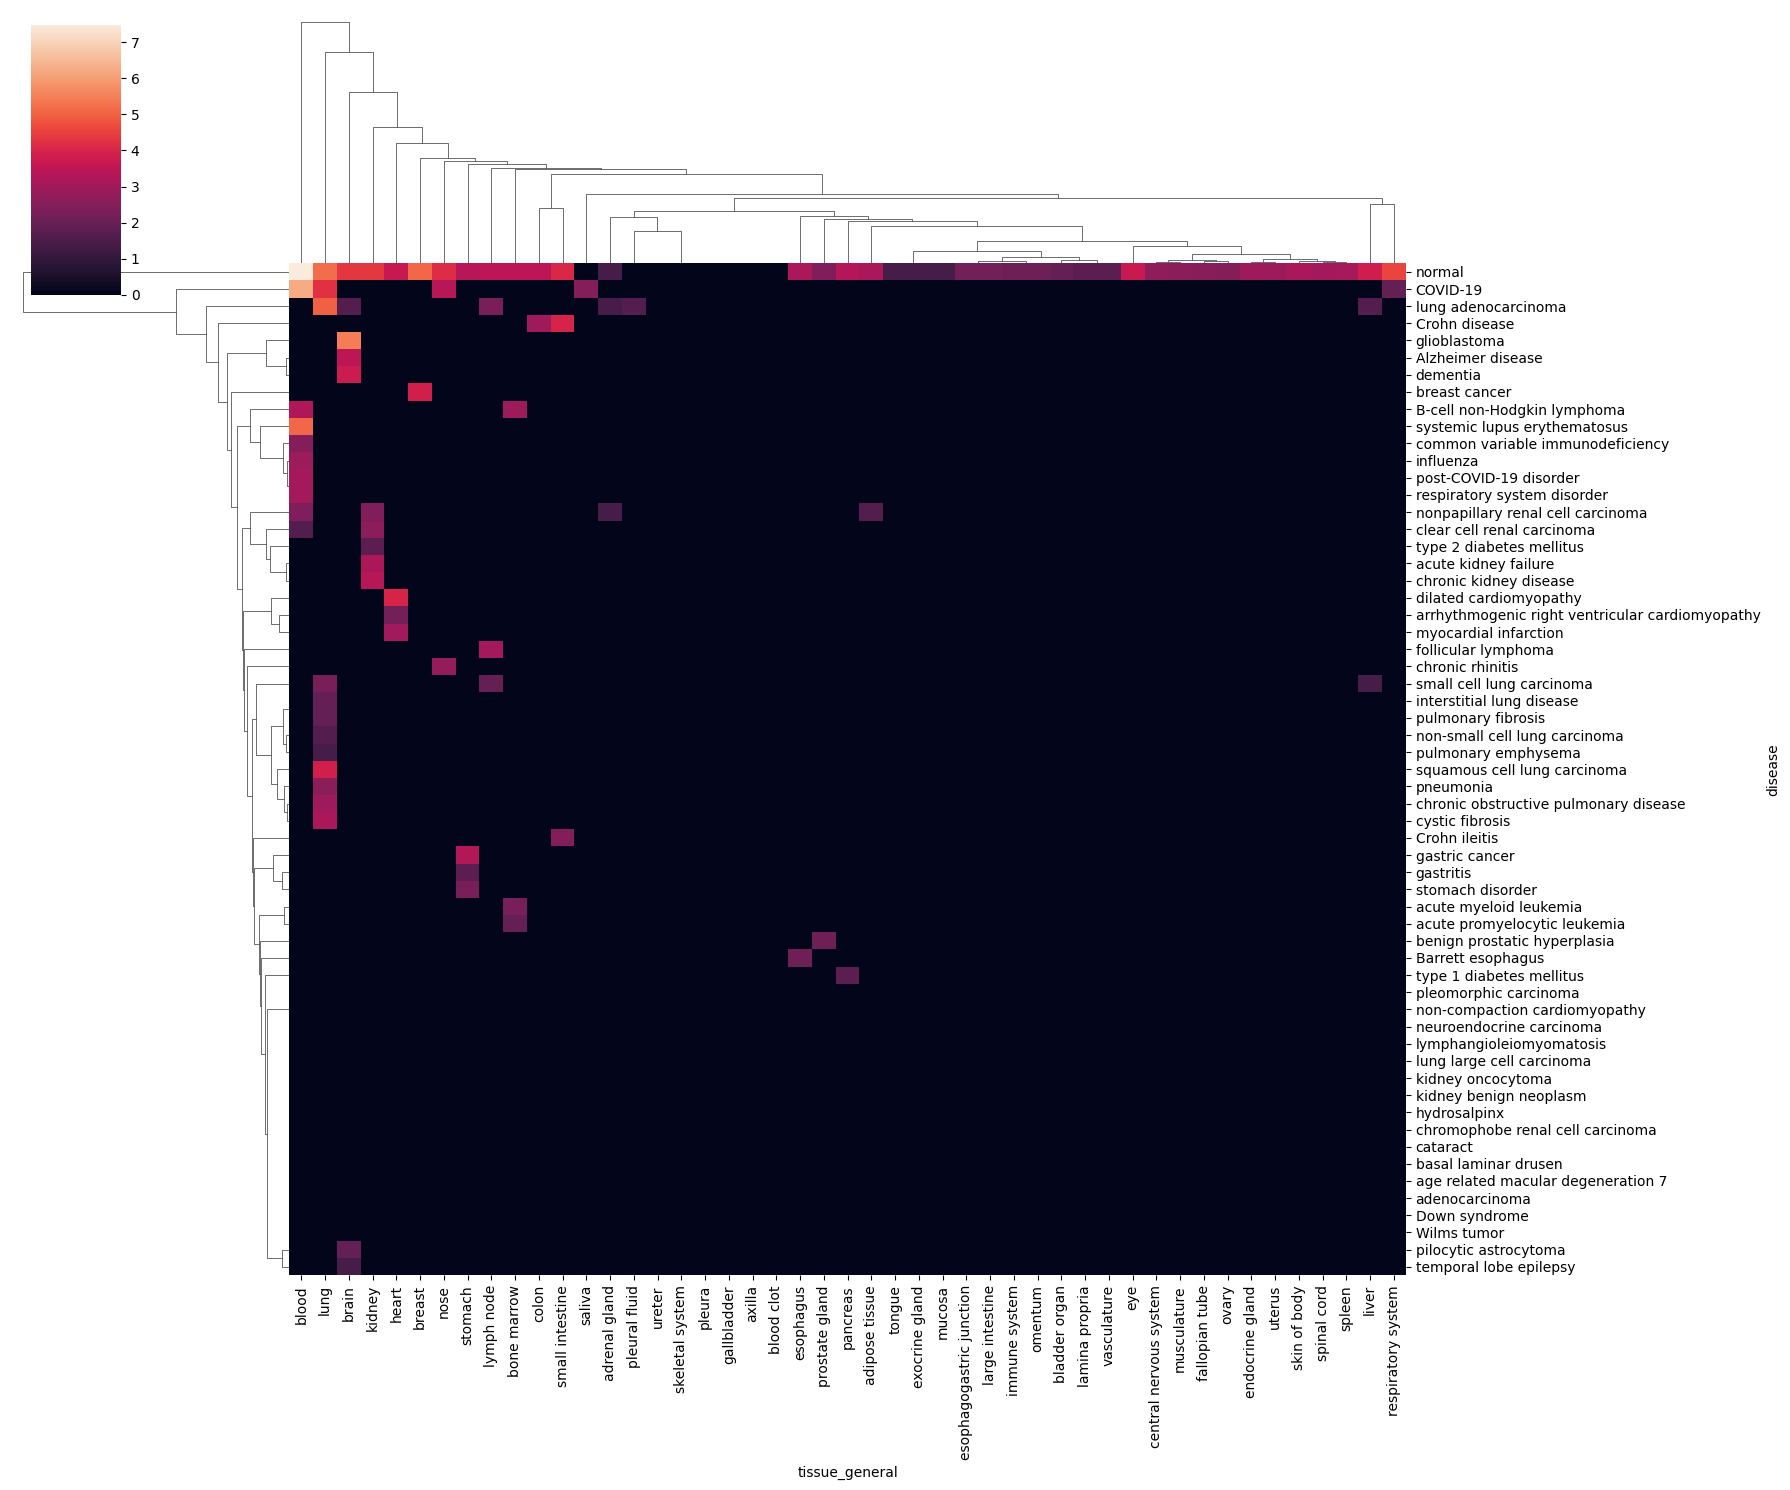

In [86]:
sns.clustermap(np.log1p(donors_by_tissue), figsize=(18,15), xticklabels=True, yticklabels=True)